# Predicting Cirrhosis of the Liver using Machine Learning
### _Dan Barstow, B.S. Mathematics: Operations Research, barstow2@illinois.edu_

## Background Information

The liver is an essential organ of the human body.  It filters out toxins, helps maintain metabolism, and helps to break down food in the digestive tract by producing bile.  Cirrhosis is a late stage of scarring of the liver caused by conditions like hepatitis, chronic alcoholism, and obesity.  The goal of this project is to determine which factors are most relevant in using machine learning models to classify Cirrhosis.

Between 1974 and 1984, a trial was conducted by the Mayo Clinic to determine if the drug D-penicillamine was effective in treating liver disease.  Ultimately, the drug was found to only be effective in chronic liver patients who were not in need of a liver transplant.  312 patients participated in the randomized trial of the drug and 112 only consented to have their measurements recorded on an ongoing basis, of which 6 eventually opted out (thus not included in the dataset).  In total there are 418 datapoints with 20 attributes each.

## Data Attributes

- `ID`: The case number.
- `N_Days`: The number of days between registration and the earlier of death, liver transplantation, or study analysis time in July, 1986.
- `Status`: Whether the patient was still alive at the time of the statistical analysis in 1986.
- `Drug`: Whether the patient was given the drug D-penicillamine or a placebo in the trial.
- `Age`: The patient's age in days.
- `Sex`: Whether the patient is male or female.
- `Ascites`: Presence of ascites which is a build up of fluid in the abdomen.
- `Hepatomegaly`: Presence of an enlarged liver.
- `Spiders`: Presence of dilated blood vessels which have a spider-like appearance.
- `Edema`: Presence of tissue swelling (typically in the feet or ankles).
- `Bilirubin`: Amount of Bilirubin present in blood measured in mg/dl (breaks down heme from old red blood cells).
- `Cholesterol`: Amount of cholesterol present in blood measured in mg/dl (provides structure to cell membranes).
- `Albumin`: Amount of albumin present in blood measured in mg/dl (keeps fluid from leaking into bloodstream).
- `Copper`: Amount of copper present in urine measured in $\mu$g/day (regulates nerve cells and immune system).
- `Alk_Phos`: Amount of Alkaline phosphatase present in blood measured in IU/L (an enzyme which can leak into the bloodstream and cause issues).
- `SGOT`: Amount of SGOT (also called AST) present in blood measured in IU/L (another enzyme which can leak into the bloodstream and cause damage).
- `Triglycerides`: Amount of triglycerides in blood measured in mg/dl (a type of fat which if too high can become an issue).
- `Platelets`: Number of platelets per-cubic-millimeter of blood / 1000 (helps blood to clot).
- `Prothrombin`: Time in seconds required for blood clots to begin forming.
- `Stage`:  Stage of liver disease (stage 4 is Cirrhosis).

## Steps
1) Set up the Environment
2) Collect and Clean Data
3) Explanatory Data Analysis and Visualization
4) Data Preprocessing
5) Machine Learning Model Fitting
6) Comparison of Results
7) Model Refitting and Final Analysis

## 1) Set up the Environment

Import the required Python Libraries for data preprocessing, plotting, and machine learning model fitting.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
!pip install shap

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Define a function to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, auc
    from sklearn import metrics
    plt.figure(figsize=(12,9))
    plt.rcParams.update({'font.size': 16})
    cm = confusion_matrix(y,y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='mako')
    ax.set_xlabel('Predicted Labels', size=16)
    ax.set_ylabel('True Labels', size=16)
    ax.set_title('Confusion Matrix', size=25)
    ax.xaxis.set_ticklabels(['No Cirrhosis', 'Cirrhosis'], size=14)
    ax.yaxis.set_ticklabels(['No Cirrhosis', 'Cirrhosis'], size=14)

## 2) Collect and Clean the Data

Load the Cirrhosis Data into a Pandas dataframe.

In [3]:
data = pd.read_csv("C:/Users/d_bar/cirrhosis.csv")

Take a look at the first 5 entries in the dataset.

In [4]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Determine the dimensions of the data matrix.

In [5]:
data.shape

(418, 20)

We'll drop the `ID` attribute since it doesn't contain meaningful information.  We also drop the `N_Days` and `Drug` attributes because the efficacy of the drug was already tested.  We drop the `Status` attribute because we're testing for presence of Cirrhosis, not predicting expected lifespan.  

In [6]:
data.drop(columns="ID", inplace=True)
data.drop(columns="N_Days", inplace=True)
data.drop(columns="Status", inplace=True)
data.drop(columns="Drug", inplace=True)

In [7]:
data.shape

(418, 16)

We notice that the units for `Age` is days, lets change that to years.

In [8]:
data['Age'] = data['Age'].div(365.25)

In [9]:
data['Age'].head()

0    58.765229
1    56.446270
2    70.072553
3    54.740589
4    38.105407
Name: Age, dtype: float64

Determine how many values are missing from the data.

In [10]:
data.isna().sum()

Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Since the size of our dataset is relatively small, we cannot afford to drop datapoints with missing values.
Instead, we'll impute the missing data with some measure of central tendency.  This has potential to introduce bias into our dataset, unfortunately in the the real world simply collecting more data isn't always an option.  For the numerical datatypes such as `Cholesterol`, we impute with the median.  For the categorical datatypes such as `Spiders`, we impute with the most frequent class (Y/N).

In [11]:
# Missing Numerical data
data.select_dtypes(include=(['int64', 'float64'])).isna().sum()

Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [12]:
# Missing Categorical data
data.select_dtypes(include=('object')).isna().sum()

Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [13]:
# Imputing with the median
data.select_dtypes(include=(['int64', 'float64'])).isna().sum()
data_num_col = data.select_dtypes(include=(['int64', 'float64'])).columns
for c in data_num_col:
    data[c].fillna(data[c].median(), inplace=True)

# We should see no more missing numerical values
data.select_dtypes(include=(['int64', 'float64'])).isna().sum()

Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [14]:
# Imputing with the most frequent category
data_cat_col = data.select_dtypes(include=('object')).columns
for c in data_cat_col:
    data[c].fillna(data[c].mode().values[0], inplace=True)

# We should see no more missing categorical values
data.select_dtypes(include=('object')).isna().sum()

Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

The `Edema` attribute has 3 classifications, `N` (no Edema), `S` (Edema present without diuretics, or resolved by diuretics), and `Y` (Edema present despite treatment with diuretics).  Let's see how many `S` classfications there are.

In [15]:
data['Edema'].value_counts()

N    354
S     44
Y     20
Name: Edema, dtype: int64

Let's balance this attribute slightly by reclassifying `S` as `Y` since `Edema` is still present.

In [16]:
data['Edema'] = data['Edema'].replace({'S':'Y'})

In [17]:
data['Edema'].value_counts()

N    354
Y     64
Name: Edema, dtype: int64

Let's see how many people are at the different stages of the disease.

In [18]:
data['Stage'].value_counts()

3.0    161
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

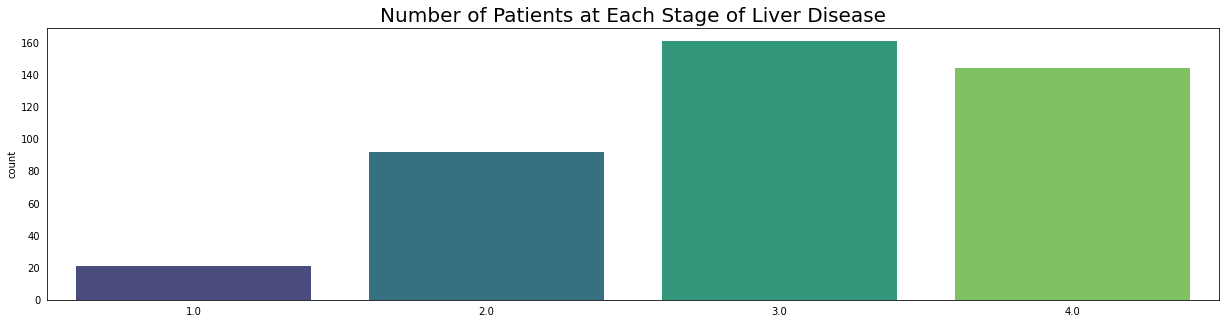

In [19]:
# Code to plot a bar graph
plt.figure(figsize=(21,5))
sns.countplot(x=data['Stage'], palette="viridis", alpha=1, )
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Patients at Each Stage of Liver Disease', size=20)
plt.show()

Since we are trying to classify Cirrhosis (`Stage` = 4), we transform the problem into a binary classification problem where 1 is Cirrhosis and 0 is no Cirrhosis.

In [20]:
data['Stage'] = np.where(data['Stage'] == 4,1,0)

In [21]:
data['Stage'].value_counts()

0    274
1    144
Name: Stage, dtype: int64

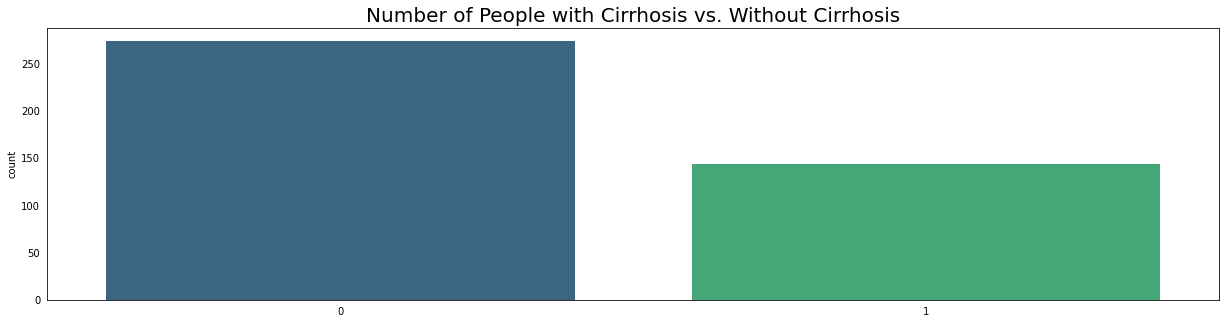

In [22]:
# Code to plot a bar graph
plt.figure(figsize=(21,5))
sns.countplot(x=data['Stage'], palette="viridis", alpha=1, )
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of People with Cirrhosis vs. Without Cirrhosis', size=20)
plt.show()

We see that roughly 1/3 of the dataset consists of patients with Cirrhosis and 2/3 without it.  We have an unbalanced dataset which can make learning difficult.  For now lets visualize the data to see if we can derive any meaningful information.

## 3) Explanatory Data Analysis and Visualization

Let's take a look at the summary statistics for the categorical data.

In [23]:
# Categorical Attributes
data.describe(include='object').T

,count,unique,top,freq
Sex,418,2,F,374
Ascites,418,2,N,394
Hepatomegaly,418,2,Y,266
Spiders,418,2,N,328
Edema,418,2,N,354


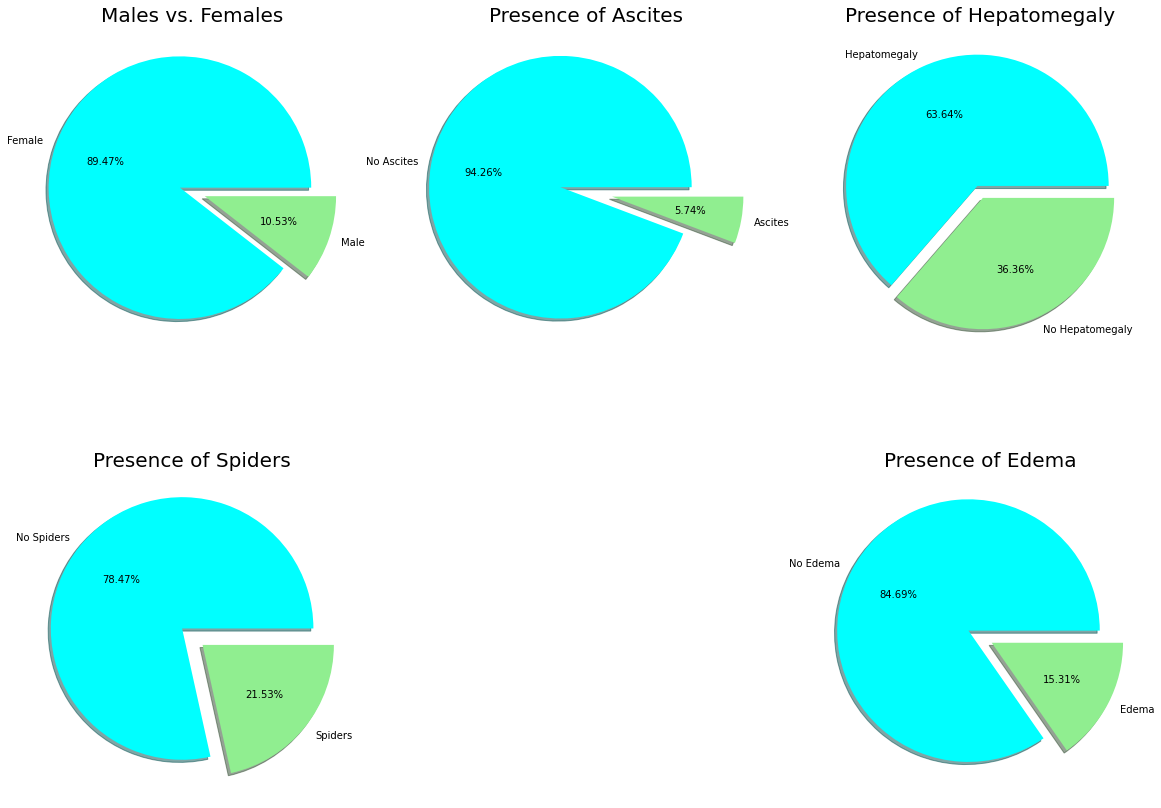

In [24]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.pie(data['Sex'].value_counts(), 
        colors=['cyan', 'lightgreen'], 
        labels=['Female', 'Male'], 
        shadow=True, 
        autopct='%1.2f%%',
        explode=(0.1,0.1))
plt.title('Males vs. Females', size=20)

plt.subplot(2,3,2)
plt.pie(data['Ascites'].value_counts(), 
        colors=['cyan', 'lightgreen'], 
        labels=['No Ascites', 'Ascites'], 
        shadow=True, 
        autopct='%1.2f%%',
        explode=(0.2,0.2))
plt.title('Presence of Ascites', size=20)

plt.subplot(2,3,3)
plt.pie(data['Hepatomegaly'].value_counts(), 
        colors=['cyan', 'lightgreen'], 
        labels=['Hepatomegaly', 'No Hepatomegaly'], 
        shadow=True, 
        autopct='%1.2f%%',
        explode=(0.05,0.05))
plt.title('Presence of Hepatomegaly', size=20)

plt.subplot(2,3,4)
plt.pie(data['Spiders'].value_counts(), 
        colors=['cyan', 'lightgreen'], 
        labels=['No Spiders', 'Spiders'], 
        shadow=True, 
        autopct='%1.2f%%',
        explode=(0.1,0.1))
plt.title('Presence of Spiders', size=20)

plt.subplot(2,3,6)
plt.pie(data['Edema'].value_counts(), 
        colors=['cyan', 'lightgreen'], 
        labels=['No Edema', 'Edema'], 
        shadow=True, 
        autopct='%1.2f%%',
        explode=(0.1,0.1))
plt.title('Presence of Edema', size=20)
plt.show()

We note a few things given that we imputed 106 values for the attributes `Ascites`, `Hepatomegaly`, `Spiders`:
1) There are many more females than males in our dataset.
2) There are many more patients without `Ascites` in our dataset.
3) There are roughly 27% more patients with `Hepatomegaly` than without.
4) There are many more patients with `Spiders` than without.
5) There are many more patients without `Edema` than with.

Look at the summary statistics of the numerical data.

In [25]:
# Numerical Attributes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,50.741551,10.447214,26.277892,42.832307,51.000684,58.240931,78.439425
Bilirubin,418.0,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,418.0,350.272727,193.123893,120.000000,273.000000,309.500000,347.750000,1775.000000
Albumin,418.0,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,418.0,91.279904,74.485481,4.000000,51.250000,73.000000,100.750000,588.000000
Alk_Phos,418.0,1799.144976,1875.121982,289.000000,1016.250000,1259.000000,1707.750000,13862.400000
SGOT,418.0,120.564067,49.085094,26.350000,91.000000,114.700000,135.750000,457.250000
Tryglicerides,418.0,119.267943,54.050691,33.000000,95.000000,108.000000,127.750000,598.000000
Platelets,418.0,256.866029,97.024861,62.000000,190.000000,251.000000,315.500000,721.000000
Prothrombin,418.0,10.731100,1.019587,9.000000,10.000000,10.600000,11.100000,18.000000


Let's see the distrubition of patient `Age`.

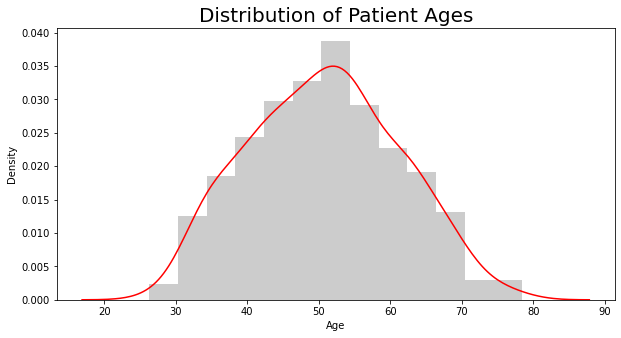

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(x=data['Age'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Patient Ages', size=20)
plt.xlabel('Age', size=10)
plt.ylabel('Density', size=10)
plt.show()

Now let's look at the distributions of the other numerical attributes.

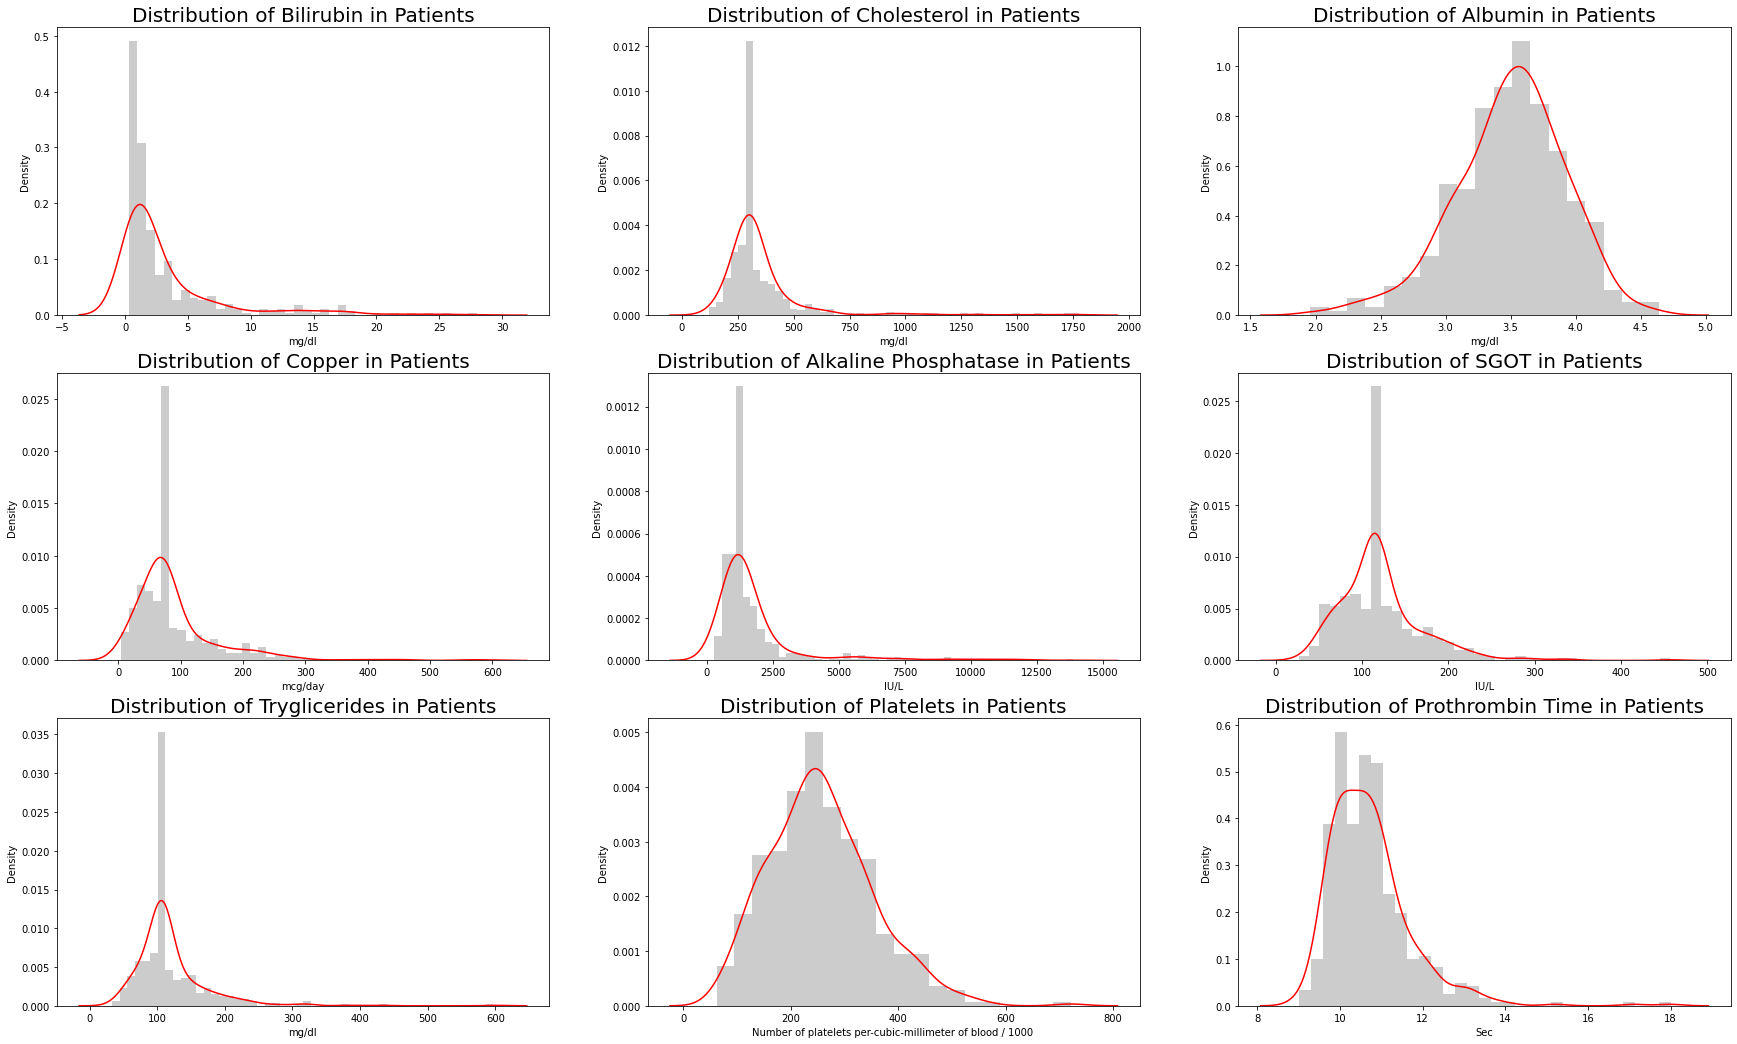

In [27]:
plt.figure(figsize=(30,18))

plt.subplot(3,3,1)
sns.distplot(x=data['Bilirubin'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Bilirubin in Patients', size=20)
plt.xlabel('mg/dl', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,2)
sns.distplot(x=data['Cholesterol'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Cholesterol in Patients', size=20)
plt.xlabel('mg/dl', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,3)
sns.distplot(x=data['Albumin'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Albumin in Patients', size=20)
plt.xlabel('mg/dl', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,4)
sns.distplot(x=data['Copper'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Copper in Patients', size=20)
plt.xlabel('mcg/day', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,5)
sns.distplot(x=data['Alk_Phos'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Alkaline Phosphatase in Patients', size=20)
plt.xlabel('IU/L', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,6)
sns.distplot(x=data['SGOT'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of SGOT in Patients', size=20)
plt.xlabel('IU/L', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,7)
sns.distplot(x=data['Tryglicerides'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Tryglicerides in Patients', size=20)
plt.xlabel('mg/dl', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,8)
sns.distplot(x=data['Platelets'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Platelets in Patients', size=20)
plt.xlabel('Number of platelets per-cubic-millimeter of blood / 1000 ', size=10)
plt.ylabel('Density', size=10)

plt.subplot(3,3,9)
sns.distplot(x=data['Prothrombin'], color='grey', kde_kws={'color':'red'})
plt.title('Distribution of Prothrombin Time in Patients', size=20)
plt.xlabel('Sec', size=10)
plt.ylabel('Density', size=10)

plt.show()

We notice that all the attributes roughly follow a normal distribution.  Note that we imputed 134 values for `Cholesterol`, 108 values for `Copper`, 106 values for `Alk_Phos` and `SGOT`, 136 values for `Tryglicerides`, 11 values for `Platelets`, and 2 values for `Prothrombin` time, so our distributions look more normal than they probably are.  Nevertheless, we can still make sensible predictions.

Let's look at the relationships between the 5 categorical features and `Stage`.

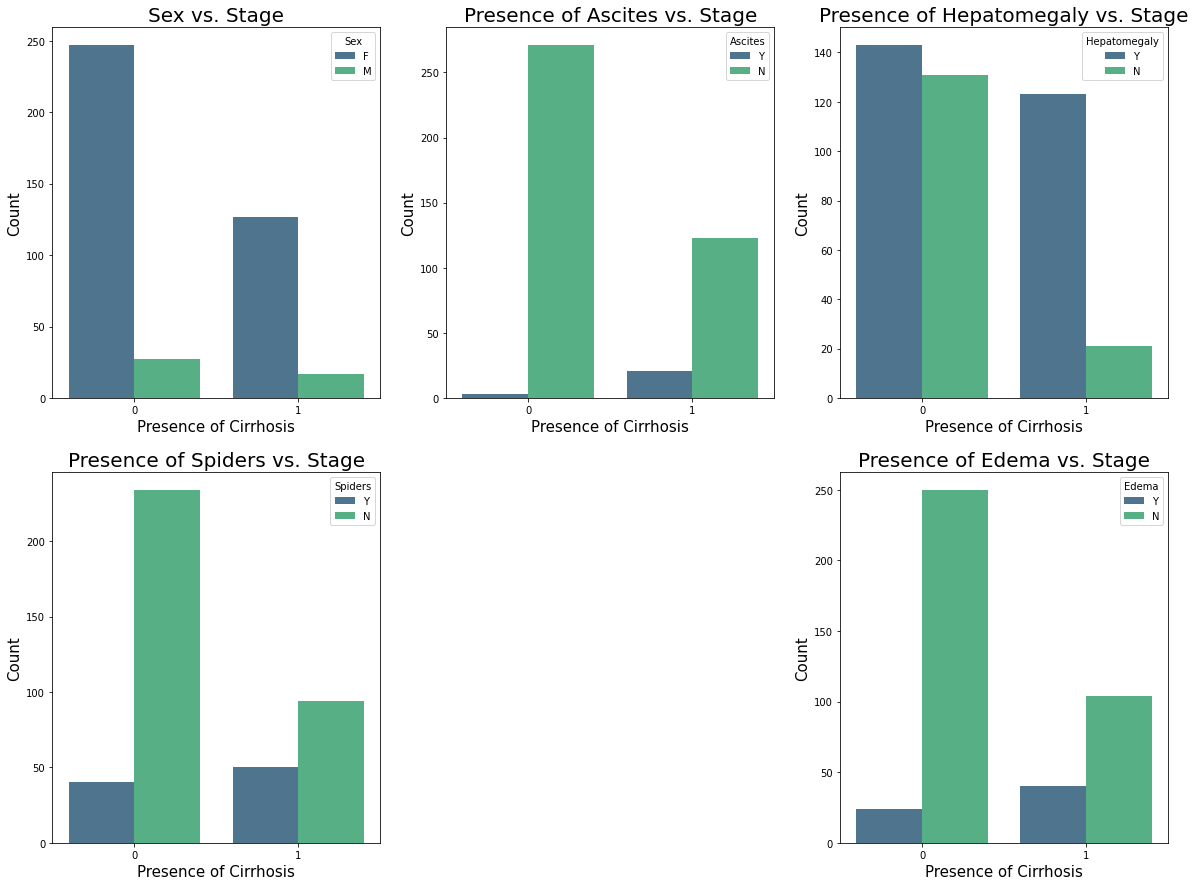

In [28]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.countplot(x=data['Stage'], hue=data['Sex'], palette='viridis', alpha=0.9)
plt.xlabel('Presence of Cirrhosis', size=15)
plt.ylabel('Count', size=15)
plt.title('Sex vs. Stage', size=20)

plt.subplot(2,3,2)
sns.countplot(x=data['Stage'], hue=data['Ascites'], palette='viridis', alpha=0.9)
plt.xlabel('Presence of Cirrhosis', size=15)
plt.ylabel('Count', size=15)
plt.title('Presence of Ascites vs. Stage', size=20)

plt.subplot(2,3,3)
sns.countplot(x=data['Stage'], hue=data['Hepatomegaly'], palette='viridis', alpha=0.9)
plt.xlabel('Presence of Cirrhosis', size=15)
plt.ylabel('Count', size=15)
plt.title('Presence of Hepatomegaly vs. Stage', size=20);

plt.subplot(2,3,4)
sns.countplot(x=data['Stage'], hue=data['Spiders'], palette='viridis', alpha=0.9)
plt.xlabel('Presence of Cirrhosis', size=15)
plt.ylabel('Count', size=15)
plt.title('Presence of Spiders vs. Stage', size=20);

plt.subplot(2,3,6)
sns.countplot(x=data['Stage'], hue=data['Edema'], palette='viridis', alpha=0.9)
plt.xlabel('Presence of Cirrhosis', size=15)
plt.ylabel('Count', size=15)
plt.title('Presence of Edema vs. Stage', size=20);

From these graphs, we can discern a few insights:
1) Presence of `Ascites` is slightly more common in patients with Cirrhosis.
2) Presence of `Spiders` is slightly more common in patients with Cirrhosis.
3) Presence of `Edema` is slightly more common in patients with Cirrhosis.
4) Non-Presence of `Hepatomegaly` is less commmon in patients with Cirrhosis.

Now let's look at the relationships between the 10 numerical features and `Stage`.

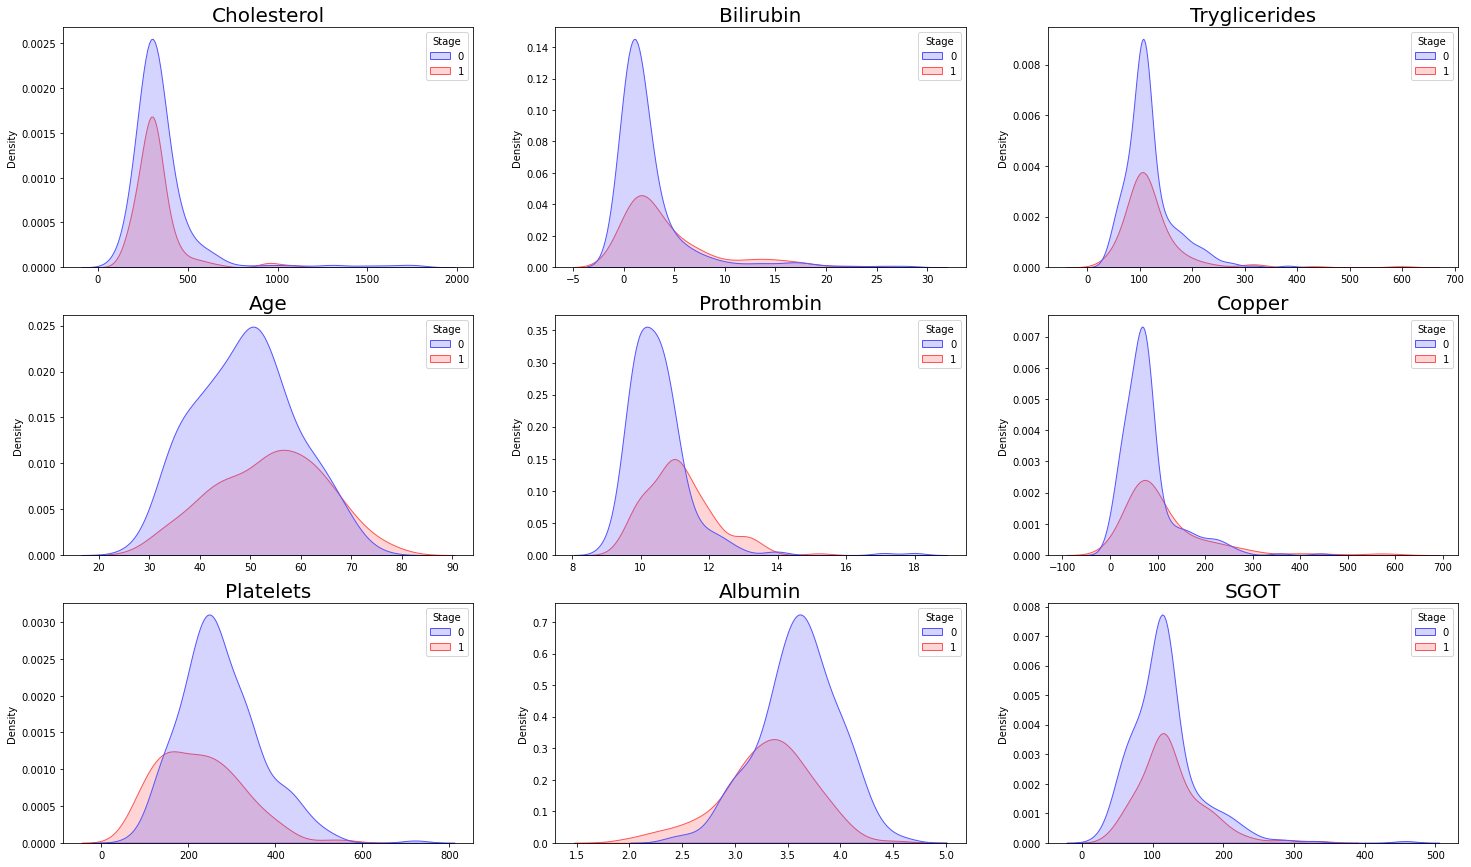

In [29]:
plt.figure(figsize=(25,15))

plt.subplot(3,3,1)
sns.kdeplot(data['Cholesterol'], hue=data['Stage'], fill=True, palette='seismic')
plt.xlabel('')
plt.title('Cholesterol', size=20);

plt.subplot(3,3,2)
sns.kdeplot(data['Bilirubin'], hue=data['Stage'], fill=True, palette='seismic', common_norm=True)
plt.xlabel('')
plt.title('Bilirubin', size=20);

plt.subplot(3,3,3)
sns.kdeplot(data['Tryglicerides'], hue=data['Stage'], fill=True, palette='seismic', common_norm=True)
plt.xlabel('')
plt.title('Tryglicerides', size=20);

plt.subplot(3,3,4)
sns.kdeplot(data['Age'], hue=data['Stage'], fill=True, palette='seismic', common_norm=True)
plt.xlabel('')
plt.title('Age', size=20);

plt.subplot(3,3,5)
sns.kdeplot(data['Prothrombin'], hue=data['Stage'], fill=True, palette='seismic', common_norm=True)
plt.xlabel('')
plt.title('Prothrombin', size=20);

plt.subplot(3,3,6)
sns.kdeplot(data['Copper'], hue=data['Stage'], fill=True, palette='seismic', common_norm=True)
plt.xlabel('')
plt.title('Copper', size=20);

plt.subplot(3,3,7)
sns.kdeplot(data['Platelets'], hue=data['Stage'], fill=True, palette='seismic')
plt.xlabel('')
plt.title('Platelets', size=20);

plt.subplot(3,3,8)
sns.kdeplot(data['Albumin'], hue=data['Stage'], fill=True, palette='seismic', common_norm=True)
plt.xlabel('')
plt.title('Albumin', size=20);

plt.subplot(3,3,9)
sns.kdeplot(data['SGOT'], hue=data['Stage'], fill=True, palette='seismic', common_norm=True)
plt.xlabel('')
plt.title('SGOT', size=20);

From these graphs, we see that:
1) Lower `Cholestrol` is more common in patients with Cirrhosis.
2) Lower `Bilirubin` is more common in patients with Cirrhosis.
3) Lower `Triglycerides` is more common in patients with Cirrhosis.
4) Higher `Age` is more common in patients with Cirrhosis.
5) Higer `Prothrombin` is more common in patients with Cirrhosis.
6) Lower `Copper` is more common in patients with Cirrhosis.
7) Lower `Platelets` is more common in patients with Cirrhosis.
8) Lower `Albumin` is more common in patients with Cirrhosis.
9) Lower `SGOT` is more common in patients with Cirrhosis.

## 4) Data Preprocessing

For our classification target `Stage`, we have 15 features: 5 Categorical and 10 Numerical.

In [30]:
len(data.columns)-1

15

Let's replace the categorical data with with numerical data so that they will work with each model.  (N/Y) for `Ascites`, `Hepatomegaly`, `Edema`, and `Spiders` attributes become (0/1).  `Sex` (M/F) becomes (0/1).  

In [31]:
data['Sex'] = data['Sex'].replace({'M':0, 'F':1})
data['Ascites'] = data['Ascites'].replace({'N':0, 'Y':1})
data['Hepatomegaly'] = data['Hepatomegaly'].replace({'N':0, 'Y':1})
data['Spiders'] = data['Spiders'].replace({'N':0, 'Y':1})                    
data['Edema'] = data['Edema'].replace({'N':0, 'Y':1})

In [32]:
data.head()

,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,58.765229,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,56.446270,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,70.072553,0,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,54.740589,1,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,38.105407,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


Now let's look at the correlation matrix and see if any attributes are highly correlated with Cirrhosis, `Stage` = 1 (larger magnitudes indicate more correlation).

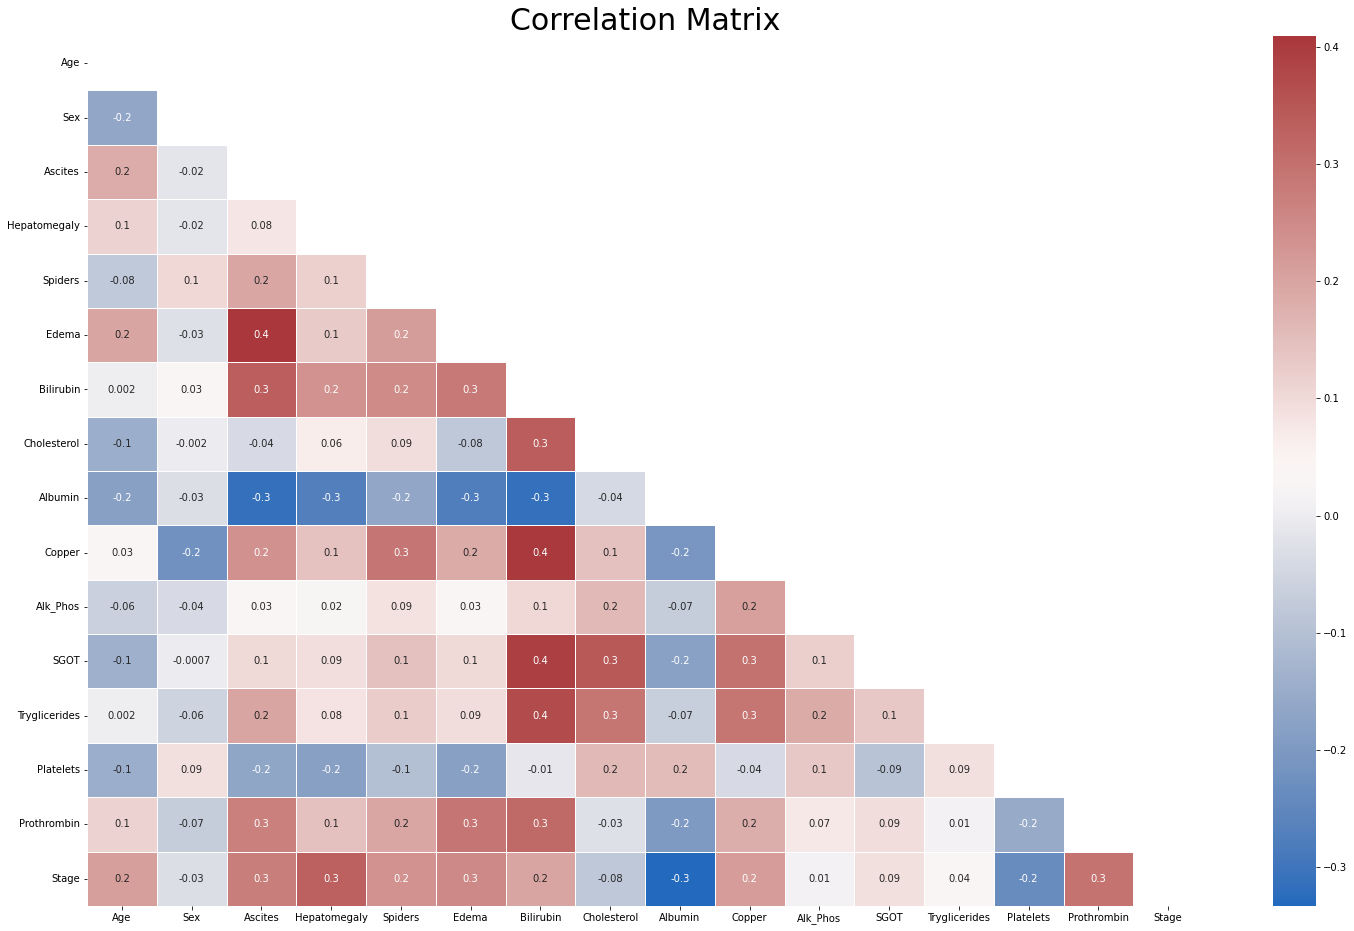

In [33]:
corr = data.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
fig, ax = plt.subplots(figsize=(25,16))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1g', cmap="vlag", cbar=True, linewidths=0.5, linecolor='white');
title=plt.title('Correlation Matrix', size=30)

Let's determine the attributes which have a correlation with `Stage` greater than 0.08.

In [34]:
cor_stage = abs(corr["Stage"])

In [135]:
relevant_features = cor_stage[cor_stage>0.08]

In [131]:
relevant_features.sort_values(ascending=False)

Stage           1.000000
Albumin         0.333060
Hepatomegaly    0.328234
Prothrombin     0.293754
Ascites         0.275527
Edema           0.250983
Platelets       0.236666
Spiders         0.232651
Copper          0.217266
Age             0.210092
Bilirubin       0.198645
SGOT            0.090118
Cholesterol     0.083042
Name: Stage, dtype: float64

In [132]:
relevant_features.count()-1

12

We note that there are 12 features with a correlation above 0.08.  Let's use these for our model.  We can examine their contribution to the model later and see if their inclusion was necessary.

Now, get the data ready for the machine learning models.  Store the 12 features with correlation with `Stage` above 0.08 in the variable `X`.

In [133]:
X = data.drop(labels=['Stage', 'Sex', 'Alk_Phos', 'Tryglicerides'], axis=1)

In [134]:
X.head()

,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,SGOT,Platelets,Prothrombin
0,58.765229,1,1,1,1,14.5,261.0,2.60,156.0,137.95,190.0,12.2
1,56.446270,0,1,1,0,1.1,302.0,4.14,54.0,113.52,221.0,10.6
2,70.072553,0,0,0,1,1.4,176.0,3.48,210.0,96.10,151.0,12.0
3,54.740589,0,1,1,1,1.8,244.0,2.54,64.0,60.63,183.0,10.3
4,38.105407,0,1,1,0,3.4,279.0,3.53,143.0,113.15,136.0,10.9


Create a Numpy array from the column `Stage` and assign it to the variable `Y`.

In [40]:
Y = data.Stage.to_numpy()
Y

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

Standardize the data in `X` so that the mean is 1 and the variance is 0.

In [41]:
X = preprocessing.StandardScaler().fit(X).transform(X)

Divide the data into training and testing sets.  The standard is 80/20 for train/test sets.

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

We see that we have 84 test samples.

In [43]:
Y_test.shape

(84,)

## 5) Machine Learning

### Logistic Regression

First we'll fit a logistic regression using a 10-Fold Cross-Validation for hyperparameter tuning.  

In [44]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [45]:
train_accuracy_1 = logreg_cv.best_score_
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7303921568627452


We note that the best training accuracy is 73.04%.  Let's try the test set now.

In [46]:
lr_score = logreg_cv.score(X_test,Y_test)
lr_score

0.8095238095238095

The performance on the test set is 80.95%  Let's look at the confusion matrix.

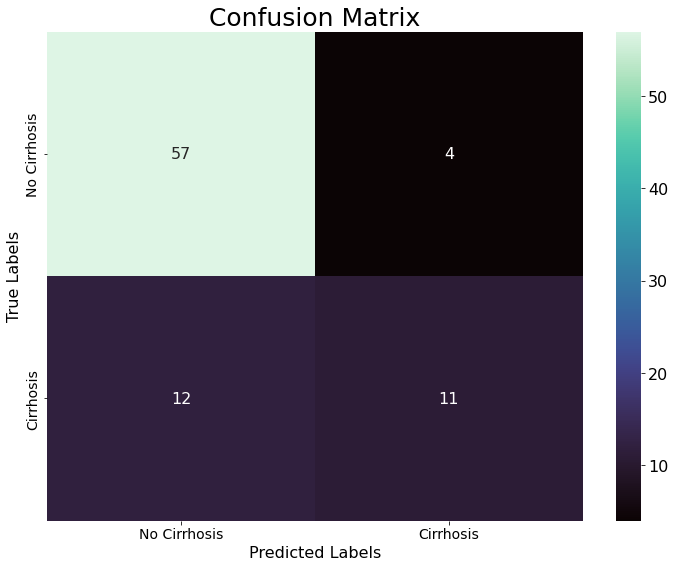

In [47]:
yhat_lr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_lr)

We see that our testing accuracy with the logistic regression model is 80.95% with only 4 false positives.  However, there is more of an issue with false negatives of which there are 12.  

Let's Look at the precision and recall.  

In [48]:
print(classification_report(Y_test, yhat_lr, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.83      0.93      0.88        61
   Cirrhosis       0.73      0.48      0.58        23

    accuracy                           0.81        84
   macro avg       0.78      0.71      0.73        84
weighted avg       0.80      0.81      0.80        84



We see that the logistic regression is better at classifying true negatives than true positives.  This is due to the imbalance of the dataset.

### Support Vector Machine

Now let's try a support vector machine (also using 10-Fold Cross-Validation).

In [49]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [50]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [51]:
train_accuracy_2 = svm_cv.best_score_
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.7155971479500892


We see that the best training accuracy is 71.56%.  Let's look at the performance on the test set.

In [52]:
svm_score = svm_cv.score(X_test,Y_test)
svm_score

0.8214285714285714

The performance on the test set is 82.14%.  What about the confusion matrix?

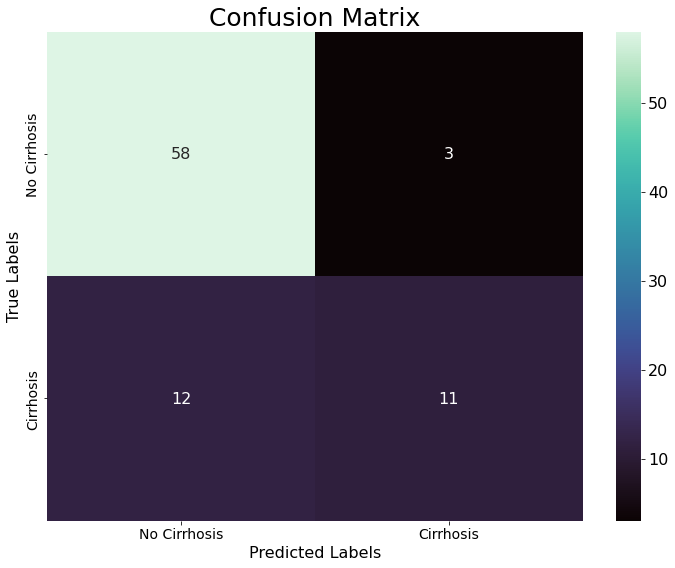

In [53]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

So the support vector machine correctly classified 1 more sample than the logistic regression, with 1 fewer false positive.

Let's look at the precision and recall.

In [54]:
print(classification_report(Y_test, yhat_svm, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.83      0.95      0.89        61
   Cirrhosis       0.79      0.48      0.59        23

    accuracy                           0.82        84
   macro avg       0.81      0.71      0.74        84
weighted avg       0.82      0.82      0.81        84



While the SVM has a slightly better accuracy for true negatives, it still has the same issues with true positives like the logistic regression.

### Decision Tree

Now let's try a decision tree (again with 10-fold Cross-Validation).

In [55]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [56]:
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [57]:
train_accuracy_3 = tree_cv.best_score_
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.7575757575757576


We see the best training accuracy was 75.75%.  How does it perform on the test set?

In [58]:
tree_score = tree_cv.score(X_test,Y_test)
tree_score

0.7738095238095238

The performance on the test set is 77.38%.  Let's look at the confusion matrix.

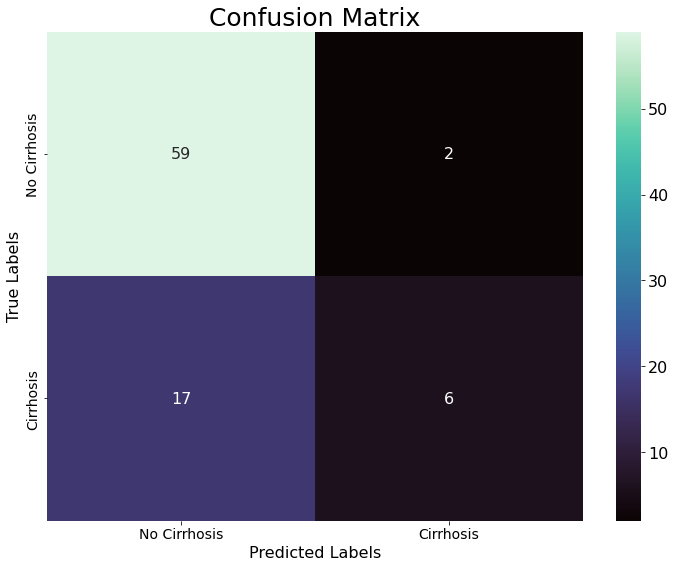

In [59]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree)

We see that the decision tree had only 2 false positives, but many false negatives.

What about the precision and recall?

In [60]:
print(classification_report(Y_test, yhat_tree, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.78      0.97      0.86        61
   Cirrhosis       0.75      0.26      0.39        23

    accuracy                           0.77        84
   macro avg       0.76      0.61      0.62        84
weighted avg       0.77      0.77      0.73        84



This model has the worst performance on the test set so far.  

### K-Nearest Neighbors

Now let's try k-nearest neighbors (again with 10-fold Cross-Validation).  

In [61]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [62]:
knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [63]:
train_accuracy_4 = knn_cv.best_score_
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.7244206773618538


We see that the best training accuracy is 72.44%  Let's see how it performs on the test data.

In [64]:
knn_score = knn_cv.score(X_test,Y_test)
knn_score

0.8095238095238095

This model has the same performance on the test data as the logistic regression, does it also have the same confusion matrix?

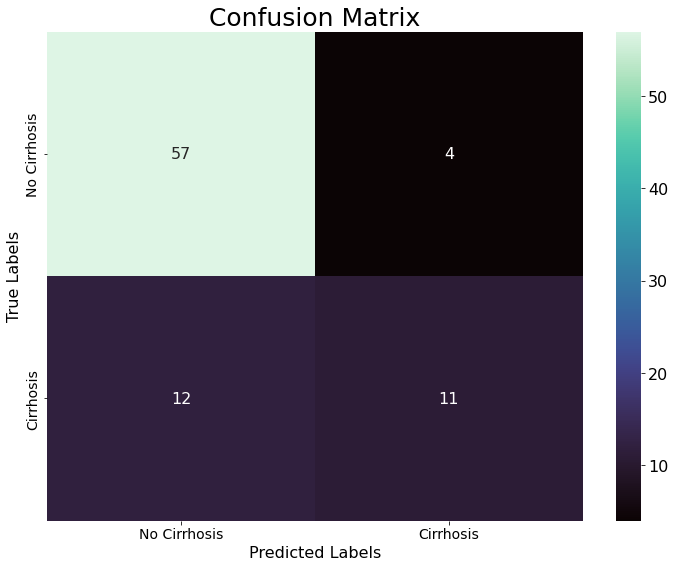

In [65]:
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn)

This model agrees with the logistic regression, making the same errors-so it has the same precision and recall.

In [66]:
print(classification_report(Y_test, yhat_knn, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.83      0.93      0.88        61
   Cirrhosis       0.73      0.48      0.58        23

    accuracy                           0.81        84
   macro avg       0.78      0.71      0.73        84
weighted avg       0.80      0.81      0.80        84



### Naive Bayes Classifier with Gaussian Kernel

Finally, let's try a gaussian naive bayes (again with 10-Fold Cross Validation).

In [67]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [68]:
nb_cv = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nb_cv.fit(X_train, Y_train)
print(nb_cv.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.657933224657568)


In [69]:
train_accuracy_5 = nb_cv.best_score_
print("tuned hyperparameters :(best parameters) ",nb_cv.best_params_)
print("accuracy :",nb_cv.best_score_)

tuned hyperparameters :(best parameters)  {'var_smoothing': 0.657933224657568}
accuracy : 0.7274509803921568


We see that the best training accuracy is 72.75%  Let's see how it performs on the test data.

In [70]:
nb_cv_score = nb_cv.score(X_test,Y_test)
nb_cv_score

0.8452380952380952

The performance on the test set is 84.52%.  Let's see the confusion matrix.

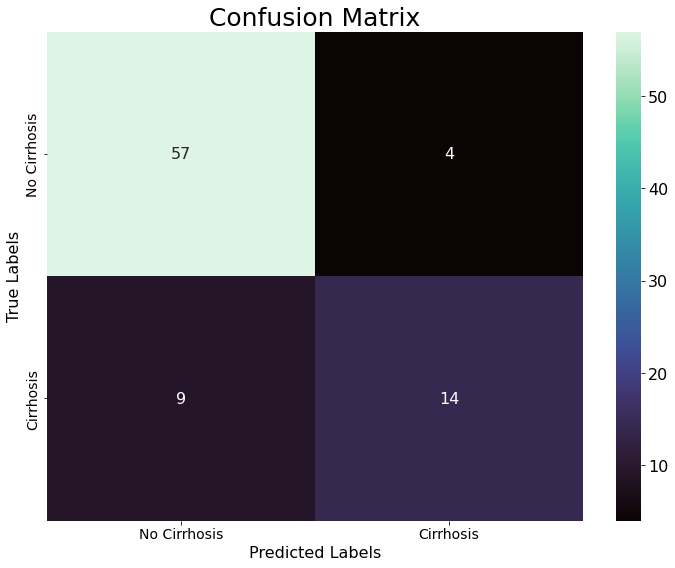

In [71]:
yhat_nb = nb_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_nb)

We see that the naive bayes classifier had the best performance with regard to false negatives, and the best overall performance.

What about the precision and recall?

In [72]:
print(classification_report(Y_test, yhat_nb, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.86      0.93      0.90        61
   Cirrhosis       0.78      0.61      0.68        23

    accuracy                           0.85        84
   macro avg       0.82      0.77      0.79        84
weighted avg       0.84      0.85      0.84        84



This model correctly classified the most patients with cirrhosis, and had the same number of false positives as the logistic regression.  

## 6) Model Evaluation

Let's look the performance of each model in the training and testing phases.

In [73]:
all_scores = [train_accuracy_1, train_accuracy_2, train_accuracy_3, train_accuracy_4, train_accuracy_5,
              lr_score, svm_score, tree_score, knn_score, nb_cv_score]

all_names = ['Log-Reg', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes', 
             'Log-Reg', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes']

train_test = ['Training', 'Training', 'Training', 'Training', 'Training',
              'Testing', 'Testing', 'Testing', 'Testing', 'Testing'] 

accuracy_df = pd.DataFrame({'Model' : all_names,
                            'Accuracy' : all_scores,
                            'Set' : train_test})

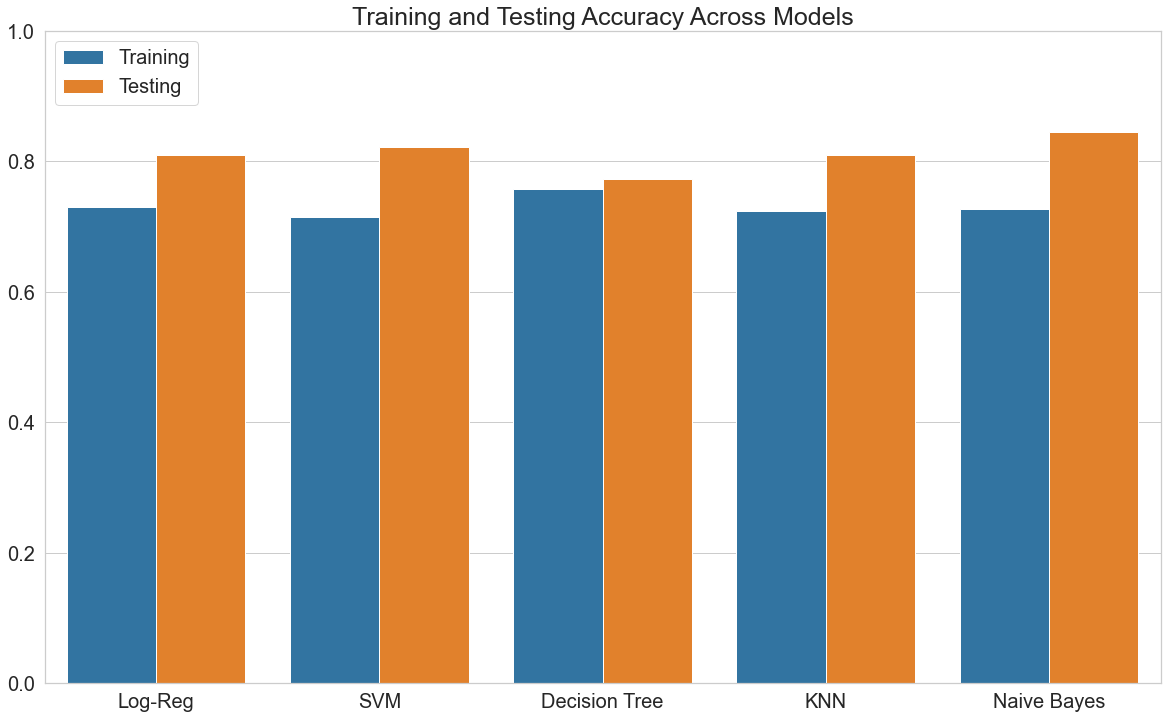

In [74]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,12))

sns.barplot(x='Model', y='Accuracy', hue='Set',  data=accuracy_df, palette='tab10')
plt.title('Training and Testing Accuracy Across Models', size=25)
plt.ylabel('', size=20)
plt.xlabel('')
plt.legend(loc=2, prop={'size': 20})
plt.ylim(0,1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Why do we see an increase in the testing accuracy compared to the training accuracy in general?
- One answer could be that our models have some generalzation potential.  
- Another reason could be that our dataset is imbalanced toward `No Cirrhosis`, so the models are better at precidicting `No Cirrhosis` than `Cirrhosis`, and this is manifesting itself here.

What can we learn from all of this?
- The worst performing model on the test set was the decision tree, but it had the lowest false positive rate (which is favorable in a clinical context).  
- K-nearest neighbors had the same performance on the test set as the logistic regression.  
- The support vector machine performed marginally better than the logistic regression.
- The best performing model on the test set was the naive bayes classifier which had the highest true positive rate, and the lowest false negative rate.
- Overall, the biggest issue aross the models seems to be a high false negative rate, while false positives are low (which is good).

| Model | Training Accuracy | Testing Accuracy |
| --- | --- | --- |
| Logistic Regression | 73.04% | 80.95% |
| Support Vector Machine | 71.56% | 82.14% |
| Decision Tree | 75.75% | 77.38% |
| K-Nearest Neighbors | 72.44% | 80.95% |
| Naive Bayes | 72.75% | 84.52% | 

### SMOTE (Synthetic Minority Oversampling Technique)

Maybe we can get better accuracy if we use SMOTE (Synthetic Minority Oversampling Technique).  This algorithm adds synthetic datapoints to the minority class by slightly modifying existing data belonging to the class.  Again, here is a plot of the number of people with and without Cirrhosis in our dataset.

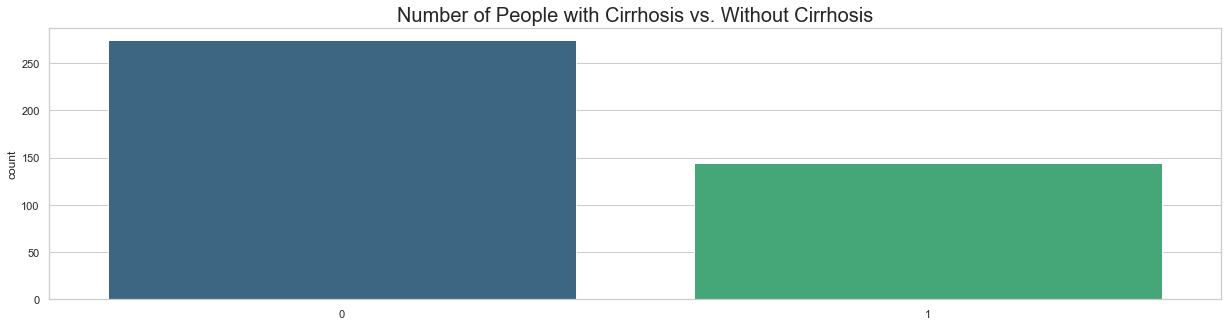

In [75]:
plt.figure(figsize=(21,5))
sns.countplot(x=data['Stage'], palette="viridis", alpha=1, )
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of People with Cirrhosis vs. Without Cirrhosis', size=20)
plt.show()

In [76]:
!pip install imbalanced-learn

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Import the required library and specify the minority strategy to balance the classes in the training set.

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smote = SMOTE(sampling_strategy='minority', n_jobs=-1)

In [79]:
X_sm, Y_sm = smote.fit_resample(X_train, Y_train)

We see now that the classes are balanced between patients with and without Cirrhosis.

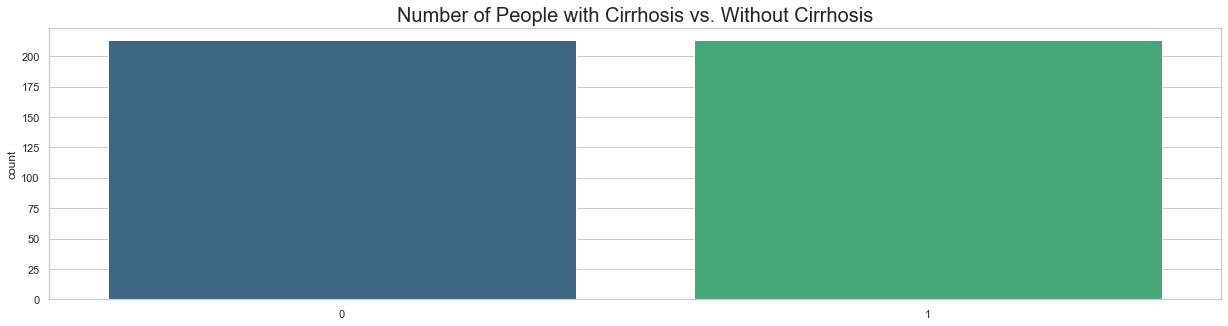

In [80]:
plt.figure(figsize=(21,5))
sns.countplot(x=Y_sm, palette="viridis", alpha=1, )
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of People with Cirrhosis vs. Without Cirrhosis', size=20)
plt.show()

Let's refit the models and see if our results on the test set improve.

## 7) Model Refitting with SMOTE

### Logistic Regression

Fit a logistic regression using a 10-Fold Cross-Validation for hyperparameter tuning.  

In [81]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_sm, Y_sm)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [82]:
train_accuracy_1 = logreg_cv.best_score_
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7110188261351051


We note that the best training accuracy went down from the previous run and is now 71.10%.  Let's try the test set now.

In [83]:
lr_score = logreg_cv.score(X_test,Y_test)
lr_score

0.7976190476190477

The performance on the test set is also lower at 79.76%  Let's look at the confusion matrix.

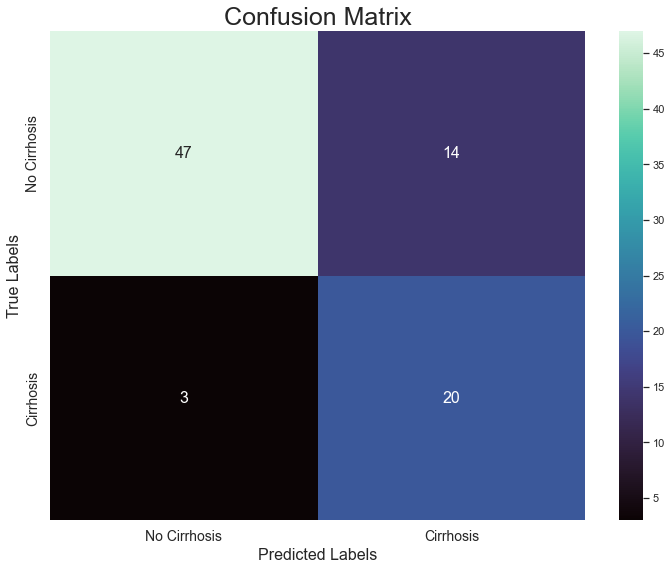

In [84]:
yhat_lr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_lr)

This time around the logistic regression was better at identifying Cirrhosis, but at the cost of more false positives, and fewer true negatives.  However, false negatives are less of an issue than before.

Let's Look at the precision and recall.  

In [85]:
print(classification_report(Y_test, yhat_lr, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.94      0.77      0.85        61
   Cirrhosis       0.59      0.87      0.70        23

    accuracy                           0.80        84
   macro avg       0.76      0.82      0.77        84
weighted avg       0.84      0.80      0.81        84



We see that this model is more sensitive to features contributing to Cirrhosis than it was before, but it lost some of its capability with classifiying true negatives.

### Support Vector Machine

Now let's try a support vector machine (also using 10-Fold Cross-Validation).

In [86]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [87]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_sm,Y_sm)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [88]:
train_accuracy_2 = svm_cv.best_score_
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy : 0.8014950166112957


We see that the best training accuracy went up to 80.15%.  Let's look at the performance on the test set.

In [89]:
svm_score = svm_cv.score(X_test,Y_test)
svm_score

0.6785714285714286

The performance on the test set went down considerably to 67.86%.  What about the confusion matrix?

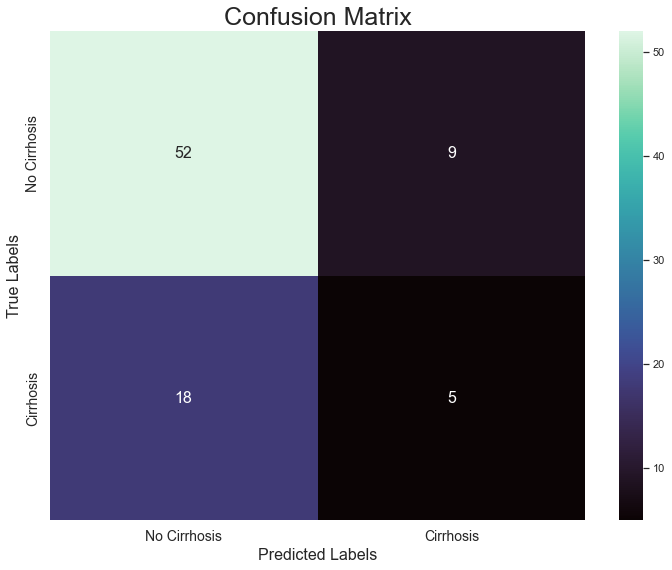

In [90]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

Here we see worse performance overall from the SVM after SMOTE.

Let's look at the precision and recall.

In [91]:
print(classification_report(Y_test, yhat_svm, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.74      0.85      0.79        61
   Cirrhosis       0.36      0.22      0.27        23

    accuracy                           0.68        84
   macro avg       0.55      0.53      0.53        84
weighted avg       0.64      0.68      0.65        84



Overall the predictive power of the SVM diminished significantly on the test set.

### Decision Tree

Now let's try a decision tree (again with 10-fold Cross-Validation).

In [92]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [93]:
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_sm,Y_sm)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [94]:
train_accuracy_3 = tree_cv.best_score_
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.767718715393134


We see the best training accuracy was 76.77%.  How does it perform on the test set?

In [95]:
tree_score = tree_cv.score(X_test,Y_test)
tree_score

0.6904761904761905

The performance on the test set is worse than before at 69.04%.  Let's look at the confusion matrix.

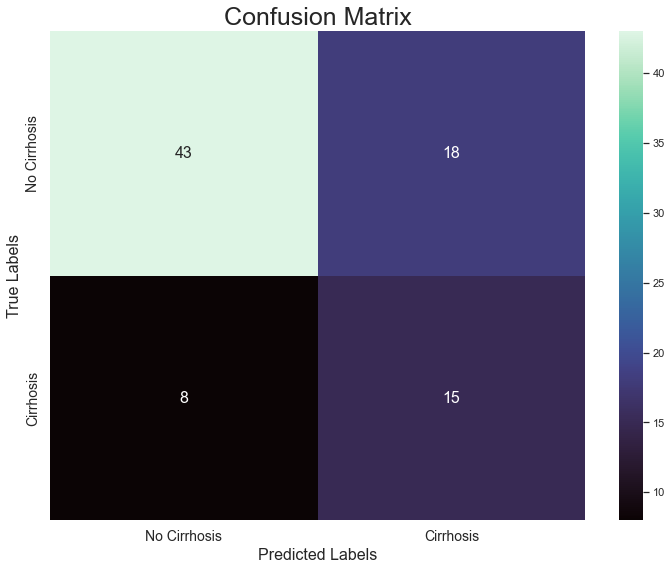

In [96]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree)

The decision tree improved in classifying Cirrhosis with fewer false negativs, but with more false positives and fewer true negatives,

What about the precision and recall?

In [97]:
print(classification_report(Y_test, yhat_tree, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.84      0.70      0.77        61
   Cirrhosis       0.45      0.65      0.54        23

    accuracy                           0.69        84
   macro avg       0.65      0.68      0.65        84
weighted avg       0.74      0.69      0.70        84



This is the only model that has gotten better overall than before, but only slightly.

### K-Nearest Neighbors

Now let's try k-nearest neighbors (again with 10-fold Cross-Validation).  

In [98]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [99]:
knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_sm,Y_sm)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [100]:
train_accuracy_4 = knn_cv.best_score_
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.7983942414174973


We see that the best training accuracy increased to 79.84%  Let's see how it performs on the test data.

In [101]:
knn_score = knn_cv.score(X_test,Y_test)
knn_score

0.6785714285714286

This model's performance on the test set dropped to 67.86%.

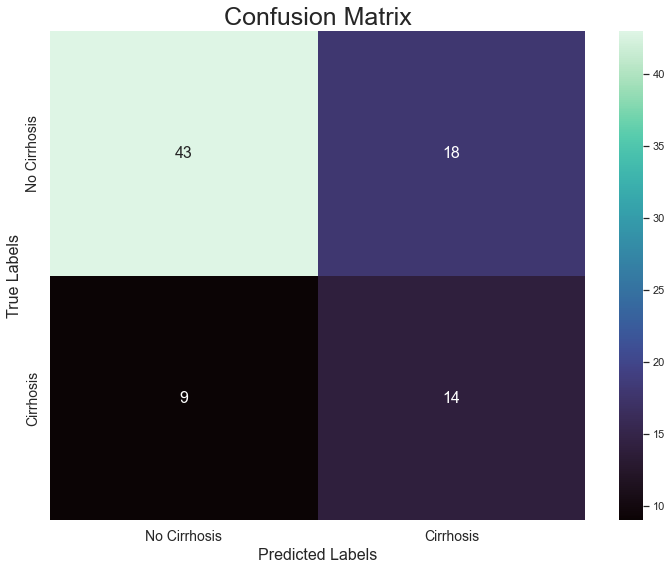

In [102]:
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn)

This time KNN was better at classifying true positives at the cost of some false positives and true negatives.

In [103]:
print(classification_report(Y_test, yhat_knn, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.83      0.70      0.76        61
   Cirrhosis       0.44      0.61      0.51        23

    accuracy                           0.68        84
   macro avg       0.63      0.66      0.64        84
weighted avg       0.72      0.68      0.69        84



Overall we see that while the true positive rate increased slightly, the model lost some predictive power making more errors than before.

### Naive Bayes Classifier with Gaussian Kernel

Finally, let's try a gaussian naive bayes (again with 10-Fold Cross Validation).

In [104]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [105]:
nb_cv = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nb_cv.fit(X_sm, Y_sm)
print(nb_cv.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.8111308307896871)


In [106]:
train_accuracy_5 = nb_cv.best_score_
print("tuned hyperparameters :(best parameters) ",nb_cv.best_params_)
print("accuracy :",nb_cv.best_score_)

tuned hyperparameters :(best parameters)  {'var_smoothing': 0.8111308307896871}
accuracy : 0.6875415282392027


We see that the best training accuracy decreased to 68.75%  Let's see how it performs on the test data.

In [107]:
nb_cv_score = nb_cv.score(X_test,Y_test)
nb_cv_score

0.7976190476190477

The performance on the test set is slightly lower than before at 79.76%.  Let's see the confusion matrix.

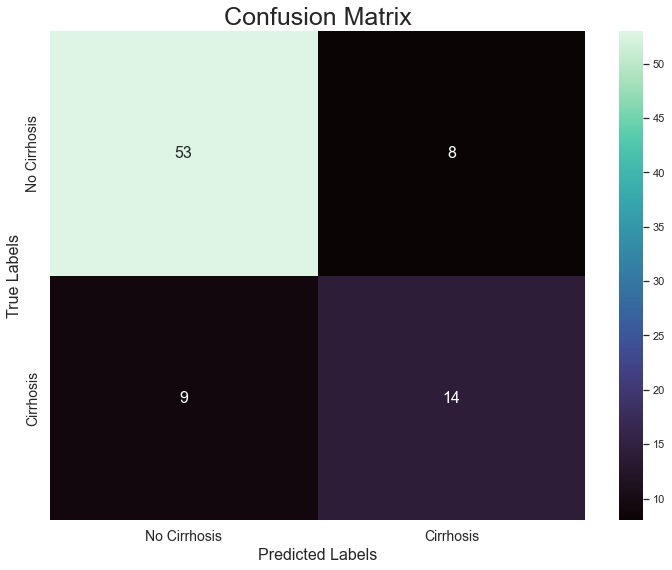

In [108]:
yhat_nb = nb_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_nb)

This time the naive bayes classifier made a few more mistakes than before in terms of false positives, and tied with the logistic regression for highest accuracy on the test set.

What about the precision and recall?

In [109]:
print(classification_report(Y_test, yhat_nb, target_names=['No Cirrhosis', 'Cirrhosis']))

              precision    recall  f1-score   support

No Cirrhosis       0.85      0.87      0.86        61
   Cirrhosis       0.64      0.61      0.62        23

    accuracy                           0.80        84
   macro avg       0.75      0.74      0.74        84
weighted avg       0.80      0.80      0.80        84



## Final Analysis

Let's take a look at how the training and testing accuracy changed after doing SMOTE.

In [110]:
all_scores = [train_accuracy_1, train_accuracy_2, train_accuracy_3, train_accuracy_4, train_accuracy_5,
              lr_score, svm_score, tree_score, knn_score, nb_cv_score]

all_names = ['Log-Reg', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes', 
             'Log-Reg', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes']

train_test = ['Training', 'Training', 'Training', 'Training', 'Training',
              'Testing', 'Testing', 'Testing', 'Testing', 'Testing'] 

accuracy_df = pd.DataFrame({'Model' : all_names,
                            'Accuracy' : all_scores,
                            'Set' : train_test})

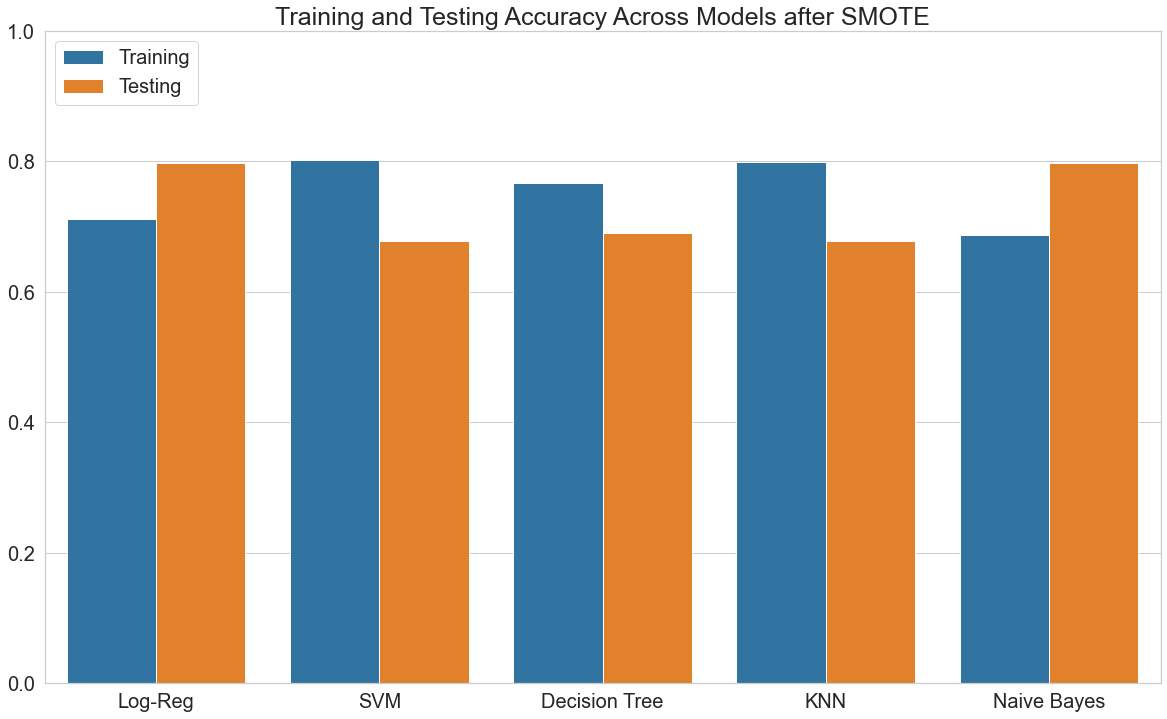

In [111]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,12))

sns.barplot(x='Model', y='Accuracy', hue='Set',  data=accuracy_df, palette='tab10')
plt.title('Training and Testing Accuracy Across Models after SMOTE', size=25)
plt.ylabel('', size=20)
plt.xlabel('')
plt.legend(loc=2, prop={'size': 20})
plt.ylim(0,1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Here we see the logistic regression and naive bayes performing better on the test set than on the training set after applying SMOTE.  They also have the same accuracy on the test set at 79.76%.    

| Model | Training Accuracy (After SMOTE)| Testing Accuracy (After SMOTE) |
| --- | --- | --- |
| Logistic Regression | 71.10% | 79.76% |
| Support Vector Machine | 80.15% | 67.86% |
| Decision Tree | 76.77% | 69.04% |
| K-Nearest Neighbors | 79.84% | 67.86% |
| Naive Bayes | 68.75% | 79.76% | 

Let's graph the performance on the test set before and after SMOTE.

In [140]:
all_scores = [.8095, .8214, .7738, .8095, .8452,
              .7976, .6786, .6904, .6786, .7976]

all_names = ['Log-Reg', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes', 
             'Log-Reg', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes']

train_test = ['Testing (Before SMOTE)', 'Testing (Before SMOTE)', 'Testing (Before SMOTE)', 'Testing (Before SMOTE)', 'Testing (Before SMOTE)', 
              'Testing (After SMOTE)', 'Testing (After SMOTE)', 'Testing (After SMOTE)', 'Testing (After SMOTE)', 'Testing (After SMOTE)']

accuracy_df = pd.DataFrame({'Model' : all_names,
                            'Accuracy' : all_scores,
                            'Set' : train_test})

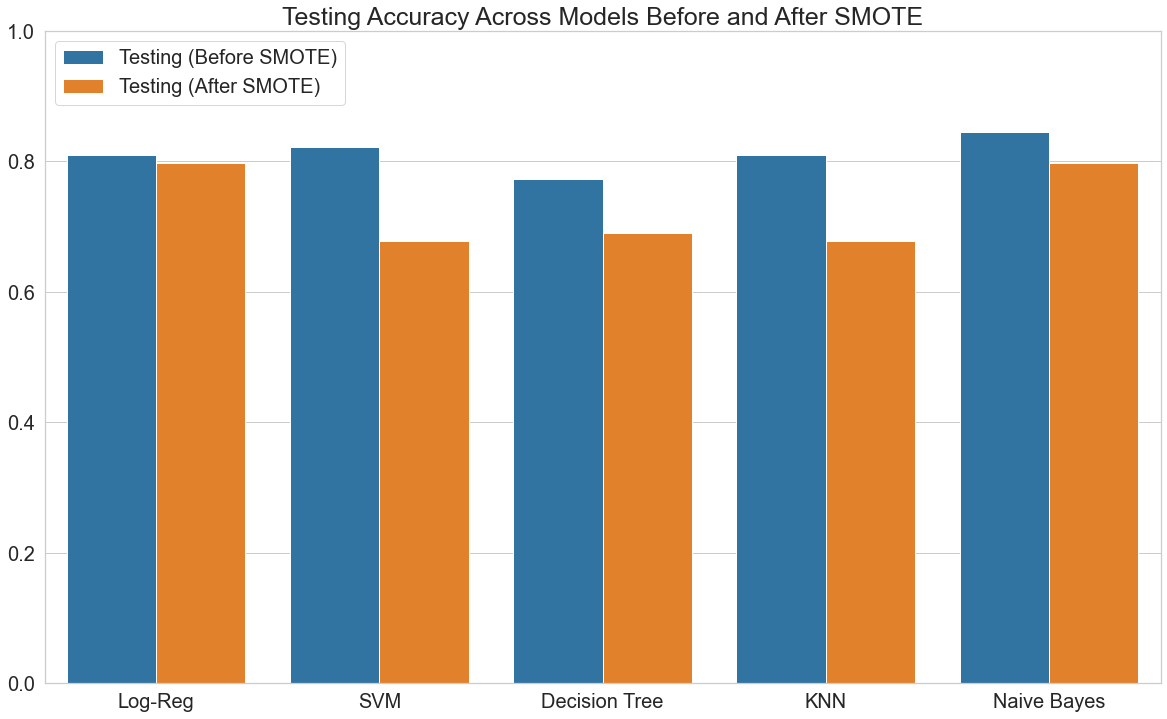

In [141]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,12))

sns.barplot(x='Model', y='Accuracy', hue='Set',  data=accuracy_df, palette='tab10')
plt.title('Testing Accuracy Across Models Before and After SMOTE', size=25)
plt.ylabel('', size=20)
plt.xlabel('')
plt.legend(loc=2, prop={'size': 20})
plt.ylim(0,1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Across all models we see an overall decrease in the accuracy on the test set after applying SMOTE.  
- Logistic Regression after SMOTE performed the best with regard to true positives.
- The SVM saw no improvement after the application of SMOTE.
- The Decision Tree after SMOTE performed second-best with regard to true positives.
- KNN saw no improvement after the application of SMOTE.
- The Naive Bayes performed slightly worse after the application of SMOTE, but was tied for performance with the logistic regression.

What can we learn from all of this?
- The logistic regression performed slightly worse overall than before.  While its ability classify true positives went up, it lost some ability to classify true negatives, making more false positive predictions than before SMOTE.  
- The SVM appears to have overfit the synthetic data, leading to worse classification ability in every respect.   
- The Decision Tree improved in correctly classifying Cirrhosis at the cost of more false positives and fewer true negatives.
- K-Nearest Neighbors improved slightly with respect to true positives and false negatives at the cost of more false positives.
- The Naive Bayes model had 4 more false positives after the application of SMOTE.

## SHAP Values (Feature Importance)

Now let's see how much each feature contributed to the logistic regression and naive bayes before and after SMOTE.  We'll use SHAP values (SHapley Additive exPlanations).  The features are ranked from most important (at the top) to least important (at the bottom).

In [114]:
import shap

In [115]:
model = LogisticRegression(penalty='l2', C=0.1)
model.fit(X_train, Y_train)

LogisticRegression(C=0.1)

In [116]:
features = ['Age', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 
            'Cholesterol', 'Albumin', 'Copper', 'SGOT', 'Platelets', 'Prothrombin']

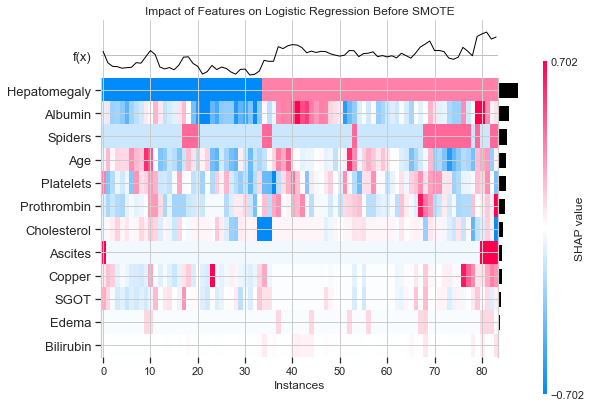

In [117]:
explainer = shap.Explainer(model, X_train, feature_names = features)
shap_values = explainer(X_test)
plt.title('Impact of Features on Logistic Regression Before SMOTE')
shap.plots.heatmap(shap_values, max_display=20)

- We see that `Hepatomegaly` was a major predictor of Cirrhosis.  
- The next 5 features: `Albumin`, `Spiders`, `Age`, `Platelets`, and `Prothrombin` all contribute moderately to the model.  
- `Cholesterol`, `Ascites`, and `Copper` only contribute slightly to the model.  
- And `SGOT`, `Edema`, and `Bilirubin` barely contribute if at all.

How does the importance of the features change as the training set changes with SMOTE?

In [118]:
model = LogisticRegression(penalty='l2', C=1)
model.fit(X_sm, Y_sm)

LogisticRegression(C=1)

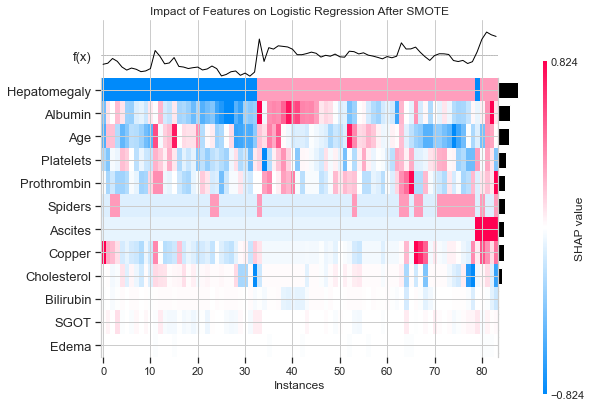

In [119]:
explainer = shap.Explainer(model, X_sm, feature_names = features)
shap_values = explainer(X_test)
plt.title('Impact of Features on Logistic Regression After SMOTE')
shap.plots.heatmap(shap_values, max_display = 20)

- After applying SMOTE to the training set, `Hepatomegaly` is still a major predictor of Cirrhosis and `Albumiin` contributes to model moderately.  
- `Platelets`, `Prothrombin`, and `Ascites` increased in importance after applying SMOTE.  
- The contribution of `Spiders` to the model after applying smote decreased significantly.  
- And `SGOT`, `Spiders`, `Bilirubin`, and `Edema` barely contribute to the model if at all.

What about the naive bayes?

In [120]:
# Naive Bayes
model = GaussianNB(var_smoothing=0.657933224657568)
model.fit(X_train, Y_train)

GaussianNB(var_smoothing=0.657933224657568)

In [121]:
explainer = shap.Explainer(model.predict, X_train, feature_names=features)
shap_values = explainer(X_test)

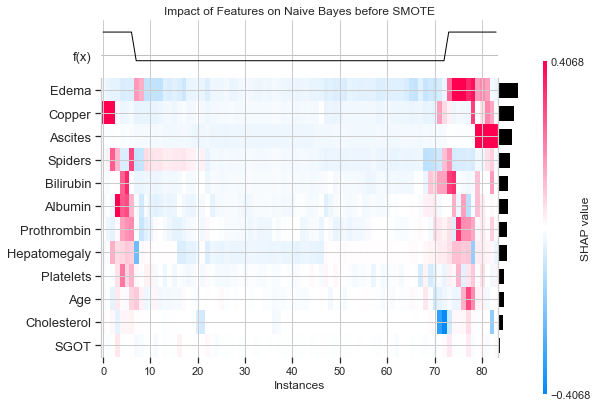

In [122]:
plt.title('Impact of Features on Naive Bayes before SMOTE')
shap.plots.heatmap(shap_values, max_display=20)

- We see that more features contribute overall to the naive bayes model than the logistic regression.  
- `Edema`, `Copper`, `Ascites`, `Spiders`, `Albumin`, `Bilirubin`, `Hepatomegaly`, and `Prothrombin` contribute the most to the naive bayes model.
- And `SGOT` barely contributes at all.

What about after SMOTE?


In [123]:
# Naive Bayes
model = GaussianNB(var_smoothing=0.657933224657568)
model.fit(X_sm, Y_sm)

GaussianNB(var_smoothing=0.657933224657568)

In [124]:
explainer = shap.Explainer(model.predict, X_sm, feature_names=features)
shap_values = explainer(X_test)

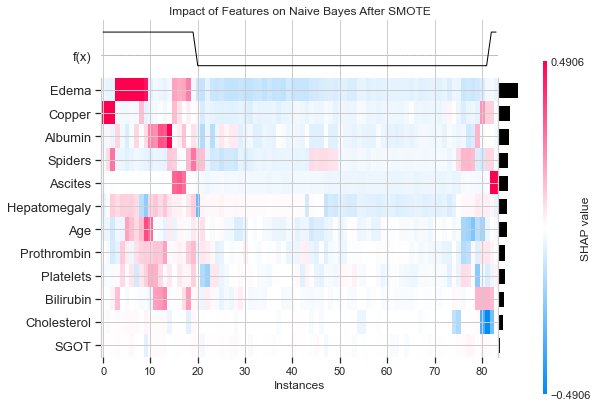

In [125]:
plt.title('Impact of Features on Naive Bayes After SMOTE')
shap.plots.heatmap(shap_values, max_display=20)

- Here we see an increase in the importance of  `Albumin`, `Hepatomegaly`, and `Age`.
- `Copper`, `Ascites`, and `Spiders` decreased in importance.

If we take a look at the 12 features we chose earlier and their correlation with the target, we see that most of the features contribute to the Naive Bayes model to an extent with a possible exception of `SGOT`.  9 of the 12 features contribute to the Logistic Regression model.

In [136]:
relevant_features.sort_values(ascending=False)

Stage           1.000000
Albumin         0.333060
Hepatomegaly    0.328234
Prothrombin     0.293754
Ascites         0.275527
Edema           0.250983
Platelets       0.236666
Spiders         0.232651
Copper          0.217266
Age             0.210092
Bilirubin       0.198645
SGOT            0.090118
Cholesterol     0.083042
Name: Stage, dtype: float64

## Conclusion

In conlusion:
- SMOTE increased the true positive rate for the logistic regression, decision tree, and K-nearest neighbors at the cost of more false positives.
- SMOTE made the support vector machine worse by all metrics and increased the number of false positives in the naive bayes.
- In the logistic regression model, SMOTE increased the importance of `Platelets`, `Prothrombin`, and `Ascites`, and decreased the importance of `Spiders` and `SGOT`.
- In the naive bayes model, SMOTE increased the importance of `Albumin`, `Hepatomegaly`, and `Age`, and decreased the importance of `Spiders`, `Copper`, and `Ascites`.  

| Model | Test Accuracy (Before SMOTE)| Test Accuracy (After SMOTE) | TPR (Before SMOTE) | TPR (After SMOTE) | TNR (Before SMOTE) | TNR (After SMOTE) | FPR (Before SMOTE) | FPR (After SMOTE) | FNR (Before SMOTE) | FNR (After SMOTE) | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 80.95% | 79.76% | 48% | 87% | 93% | 77% | 7% | 23% | 52% | 13% | 
| Support Vector Machine | 82.14% | 67.86% | 48% | 22% | 95% | 85% | 5% | 15% | 52% | 78% |
| Decision Tree | 77.38% | 69.04% | 26% | 65% | 97% | 70% | 3% | 30% | 74% | 35% |
| K-Nearest Neighbors | 80.95% | 67.86% | 48% | 70% | 93% | 61% | 7% | 39% | 52% | 30% |
| Naive Bayes | 84.52% | 79.76% | 61% | 61% | 93% | 87% | 7% | 13% | 39% | 39% |

In a clinincal context, a sensible goal would be to minimize false positives.  In this case it would make sense to select the Decision Tree model with only 2 false positives.  On the other hand, the best performing model overall was the Naive Bayes without any modication of the training set, with an accuracy of 84.52% on the test set.  On the other other hand, the Logistic Regression (after modifying the training set with SMOTE) had the highest true positive rate.  All of these factors must be taken into account when using statistical tools to aid in the diagnosis of any disease.  

_The dataset for this project can be found here: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset._